# Tâche 7

BUT: 

-déterminer la bande interdite,

-trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches),

-calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

## Importation des bibliothèques

In [3]:
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from IPython.display import FileLink
from pymatgen.electronic_structure.plotter import BSPlotter
from pymatgen.electronic_structure import plotter
import numpy as np
import matplotlib.pyplot as plt

## Récupération de la structure du matériau et écriture du fichier cif

In [4]:
key =  "rEVEIFsc61iExKZbJ2QyepniwSgJ1m6W"  #my key for API access
material = "mp-28554"    #ID of my material
m = MPRester(key)
struct = m.get_structure_by_material_id(material,conventional_unit_cell=True) #Getting structure object
w = CifWriter(struct)    #Write to CIF
w.write_file(material+".cif") 
display(FileLink(material+".cif"))

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

/home/users/m/w/mwillems/mp-28554.cif

# Structure de la bande électronique

On va récupéré et visualisé la structure de la bande électronique.

### Structure de la bande électronique 

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

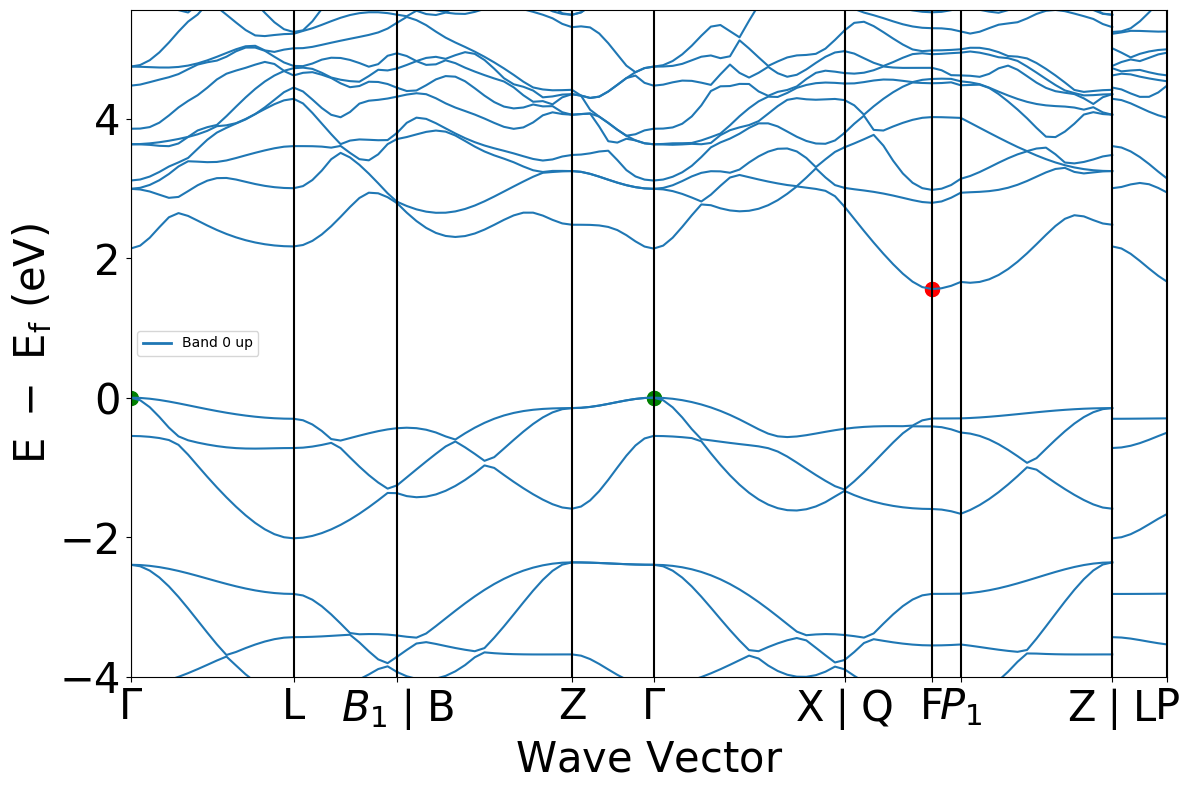

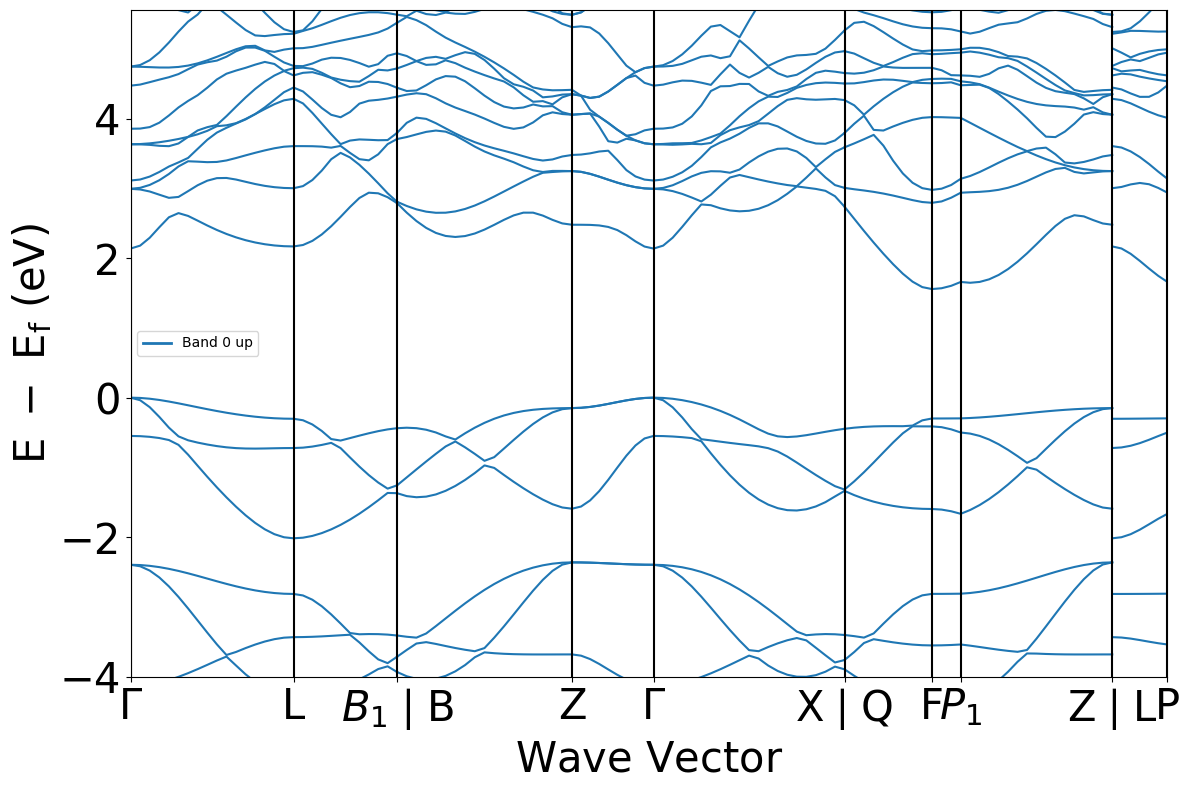

{'direct': False, 'energy': 1.5566, 'transition': '\\Gamma-F'}


In [5]:
band = m.get_bandstructure_by_material_id(material)
bsplotter = BSPlotter(band)
bsplotter.get_plot(vbm_cbm_marker=True)
bsplotter.show()
print(band.get_band_gap())


## Bande interdite

### Bande interdite direct ou indirecte ? 
Est ce que nous sommes dans le cas d'une bande interdite direct ou indirecte? Pour rappel, une bande interdite est la plage d'énergie située entre la bande de valence (occupée par les électrons) et la bande de conduction (où les électrons peuvent se déplacer librement pour conduire l'électricité) dans un matériau semi-conducteur ou isolant. Si on a une bande interdite direct alors le minimum de la bande de conduction et le maximum de la bande de valence se situent au même vecteur d'onde (k) dans l'espace réciproque. 
Si on a une bande interdite indirecte alors le minimum de la bande de conduction et le maximum de la bande de valence ne sont pas alignés en k.

In [6]:
gap = band.get_band_gap()
e_band = gap.get('energy')
print('Energie de la bande :', e_band, 'eV.')
if gap.get('direct') == False:
    print('La bande interdite est indirect.')
else:
    print('La bande interdite est direct.')

print('La bande interdite se situe entre 0 eV et {} eV.'.format(e_band))
print("Vecteur de transition :", gap['transition'])

Energie de la bande : 1.5566 eV.
La bande interdite est indirect.
La bande interdite se situe entre 0 eV et 1.5566 eV.
Vecteur de transition : \Gamma-F


#### Analyse

On est dans le cas d'un semi-conducteur car le gap est plus petit que 3 eV. Si on était dans le cas d'un métaux on aurait pas de bande interdite car les bande de valence et de conduction se chevauche. 

La valeur de 1.5566 eV indique l’énergie minimale nécessaire pour exciter un électron de la bande de valence vers la bande de conduction.

Le maximum de la bande de valence se situe au point Gamma tandis que le minimum de la bande de conduction se situe au point F.


## Dispertion

La dispersion, propre aux milieux dispersifs, entraîne une propagation des fréquences à des vitesses différentes. Elle dépend de la variation de l’énergie avec le vecteur d’onde K. On évalue ce phénomène en déterminant les pentes extrêmes des branches, une pente maximale traduisant une forte dispersion.

In [13]:
data = plotter.BSPlotter(band).bs_plot_data()
x = data.get('ticks').get('distance')
x = np.array([x[0], x[1], x[3], x[5], x[7], x[9], x[11], x[13]])
y = data.get('energy')

# Determine l'énergie 0
E_0 = data.get('zero_energy')
print("Energie 0 = {} eV".format(E_0))

# Determine la dernière bande de valence
lastV = band.get_vbm()
E_lastV = lastV['energy']
kpoint_lastV = lastV['kpoint'].cart_coords

print('Energie du maximum de la bande de valence = {} eV'.format(E_lastV))
print('sur le graphe : E-Ef = ', (E_lastV-E_0))
print('Vecteur k  en coordonnées cartésiennes =', kpoint_lastV)
print(lastV.get('band_index'))

Energie 0 = 3.1023 eV
Energie du maximum de la bande de valence = 3.1023 eV
sur le graphe : E-Ef =  0.0
Vecteur k  en coordonnées cartésiennes = [0. 0. 0.]
defaultdict(<class 'list'>, {<Spin.up: 1>: [14, 15]})


In [14]:
cbm = band.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbm.get('band_index'))

Energie du minimum de la bande de conduction =  4.6589 eV
sur le graphe : E-Ef =  1.5566
Vecteur k (coordonnées cartésiennes) = [ 0.41230955  0.         -0.76554768]
defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


In [18]:
dx = np.zeros(7)
dyc = np.zeros(7)
dyv = np.zeros(7)
mc = np.zeros(7)
mv = np.zeros(7)

for i in range(7):
    dx[i] = x[i+1] - x[i]
    
for i in range(7):
    dyv[i] =y.get('1')[i][14][-1] - y.get('1')[i][14][0]
    dyc[i] =y.get('1')[i][15][-1] - y.get('1')[i][15][0]
    
for i in range (7):
    mc[i] = dyc[i]/dx[i]
    mv[i] = dyv[i]/dx[i] 
    

print("En valeur absolue:")
mxV = np.max(abs(mv))
print("Plus grande dispersion pour la bande de valence: ", mxV)
mxC = np.max(abs(mc))
print("Plus grande dispersion pour la bande de conduction: ", mxC)
mnV = np.min(abs(mv))
print("Plus faible dispersion pour la bande de valence: ", mnV)
mnC = np.min(abs(mc))
print("Plus faible dispersion pour la bande de conduction: ", mnC)

En valeur absolue:
Plus grande dispersion pour la bande de valence:  6.148426733780636
Plus grande dispersion pour la bande de conduction:  1.0050312930218344
Plus faible dispersion pour la bande de valence:  0.11256589612925824
Plus faible dispersion pour la bande de conduction:  0.001931908972470177


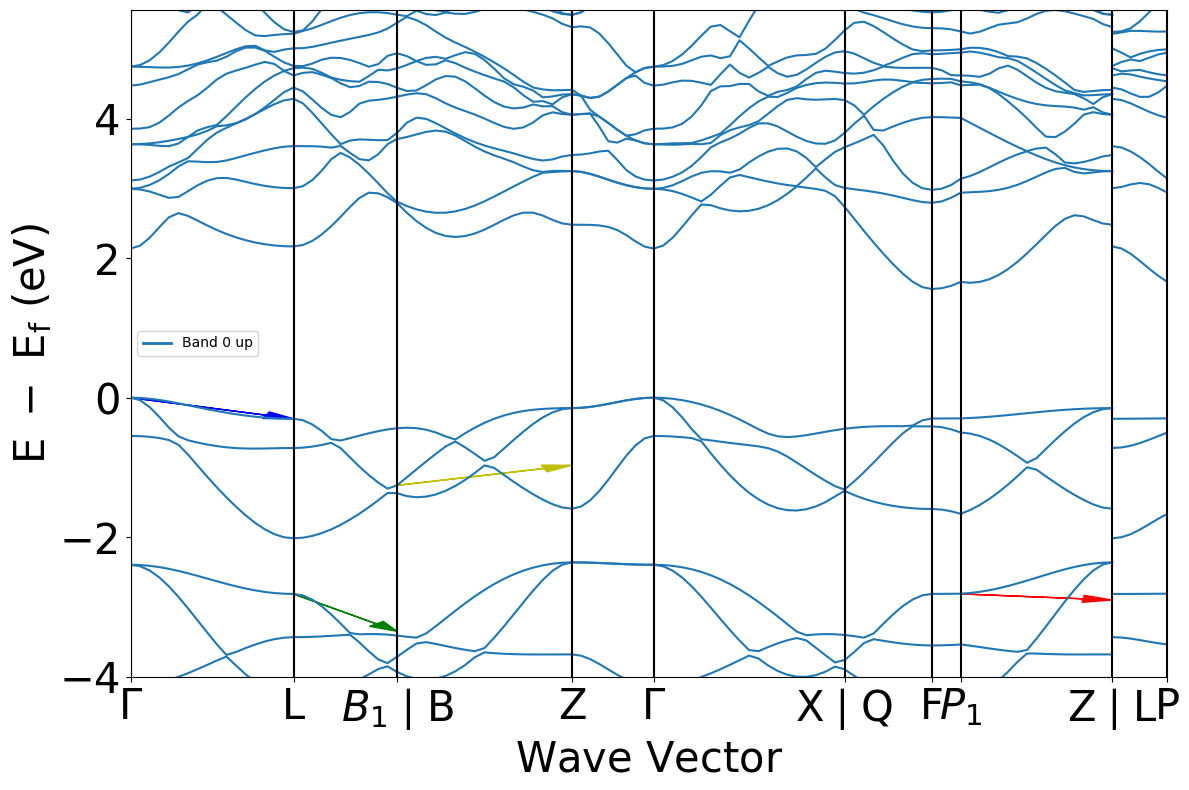

In [26]:
BSPlotter(band).get_plot()
plt.arrow(x[6], (y.get('1')[6][12])[0], dx[6], dyv[6], color = 'r', head_width = 0.1,length_includes_head=True)
plt.arrow(x[1], (y.get('1')[1][12])[0], dx[1], dyv[1], color = 'g', head_width = 0.1,length_includes_head=True)
plt.arrow(x[0], (y.get('1')[0][14])[0], dx[0], dyc[0], color = 'b', head_width = 0.1,length_includes_head=True)
plt.arrow(x[2], (y.get('1')[2][14])[0], dx[2], dyc[2], color = 'y', head_width = 0.1,length_includes_head=True)

plt.show()

## Masse effective

Calcul de la masse effective dans la bande de conduction :

Les points minimum et un point voisin sont utilisés pour déterminer l'équation parabolique. La dérivée seconde de l'énergie par rapport au vecteur d'onde est calculée. En utilisant la formule de la masse effective, la masse effective est calculée.  𝐸(𝑘)=𝐸0+ℏ2𝑘22𝑚∗
  Où :

𝐸(𝑘)
  est l'énergie électronique en fonction du vecteur d'onde ( k ).
𝐸0
  est l'énergie au sommet (ou à la base) de la bande.
ℎ𝑏𝑎𝑟
  est la constante de Planck
𝑚∗
  est la masse effective de l'électron. Affichage des résultats pour la bande de conduction.
On suppose que la dispersion des bandes électroniques est parabolique autour du point maximal (bande de valence) et du point minimal (bande de conduction), et on utilise cette hypothèse pour calculer la masse effective.

In [39]:
hbar = 1.054571818*10**(-34)
eV = 1.602176563*10**(-19)
A = 10**(-10)
D = data.get('ticks').get('distance')
E = data.get('energy').get('1')
Dbranch = np.unique(D)
Vindex = 7
Cindex = 8

print("Masse effective dans la bande de valence")
dist = data.get('distances')
print("Pour trouver la fonction parabolique de la dispersion, il nous faut utiliser 2 points : le point de maximum et un point voisin")
print("Point maximal : (",Dbranch[0], ",", E[0][Vindex][0], "), point sur la branche Gamma" )
print("Second point : (",Dbranch[1], ",", E[1][Vindex][0], "), point sur la branche X" )

a = (E[1][Vindex][0]-E[0][Vindex][0])/(Dbranch[1]-Dbranch[0])**2

d2E =  2*a*(A**(2))*eV
print("\n")
print("on peut calculer la dérivée seconde f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2]")
print("Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("On peut calculer la masse effective m* =", hbar**2/d2E, "[kg]")

print("Masse effective dans la bande de conduction")
dist = data.get('distances')

print("Pour trouver la fonction parabolique de la dispersion, il nous faut utiliser 2 points : le point de minimum et un point voisin")
print("Point minimal : (",Dbranch[0], ",", E[0][Cindex][0], "), point sur la branche Gamma" )
print("Second point : (",Dbranch[1], ",", E[0][Cindex][0], "), point sur la branche X" )

a = (E[1][Cindex][0] - E[0][Cindex][0])/(Dbranch[1]-Dbranch[0])**2

d2E =  2*a*(A**(2))*eV

print("\n")
print("on peut calculer la dérivée seconde f''(k) =", 2*a , "[eV.A^2]  =", d2E, "[J.m^2]")
print("Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))")
print("On peut calculer la masse effective m* =", hbar**2/d2E, "[kg]")

Masse effective dans la bande de valence
Pour trouver la fonction parabolique de la dispersion, il nous faut utiliser 2 points : le point de maximum et un point voisin
Point maximal : ( 0.0 , -21.4686 ), point sur la branche Gamma
Second point : ( 0.8353281628425625 , -21.470299999999998 ), point sur la branche X


on peut calculer la dérivée seconde f''(k) = -0.004872643853507197 [eV.A^2]  = -7.806835781935237e-42 [J.m^2]
Par la formule m* = (hbar**2)/((d**2 E)/(dk**2))
On peut calculer la masse effective m* = -1.424548626849867e-27 [kg]
Masse effective dans la bande de conduction
Pour trouver la fonction parabolique de la dispersion, il nous faut utiliser 2 points : le point de minimum et un point voisin
Point minimal : ( 0.0 , -13.2888 ), point sur la branche Gamma
Second point : ( 0.8353281628425625 , -13.2888 ), point sur la branche X


on peut calculer la dérivée seconde f''(k) = 0.7569795539479792 [eV.A^2]  = 1.2128149000056467e-39 [J.m^2]
Par la formule m* = (hbar**2)/((d**2 E)